In [1]:
import pandas as pd

In [2]:
dataframe=pd.read_csv("GBPUSD240.csv", delimiter=',', names=['Fecha', 'Open', 'High', 'Low', 'Close', 'Volume'])

In [3]:
#dataframe.columns(['fecha','hora''open','close','high','low','volume'])
dataframe.head()

,Fecha,Open,High,Low,Close,Volume
2005.07.11,12:00,1.7431,1.7470,1.7418,1.7463,2771
2005.07.11,16:00,1.7463,1.7591,1.7456,1.7581,2742
2005.07.11,20:00,1.7581,1.7594,1.7563,1.7580,1969
2005.07.12,00:00,1.7577,1.7618,1.7550,1.7606,2306
2005.07.12,04:00,1.7613,1.7668,1.7606,1.7639,2619


In [4]:
dataframe.describe()

,Open,High,Low,Close,Volume
count,20700.000000,20700.000000,20700.000000,20700.000000,20700.000000
mean,1.602728,1.605348,1.600108,1.602716,8928.570531
std,0.210815,0.210921,0.210718,0.210816,7123.000147
min,1.199770,1.204150,1.182460,1.202920,1.000000
25%,1.479245,1.482930,1.474880,1.479053,2715.750000
50%,1.582095,1.584655,1.579770,1.582150,7490.500000
75%,1.709370,1.711165,1.707178,1.709050,13382.500000
max,2.112300,2.116100,2.109300,2.112400,58427.000000


In [5]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20700 entries, 2005.07.11 to 2018.11.15
Data columns (total 6 columns):
Fecha     20700 non-null object
Open      20700 non-null float64
High      20700 non-null float64
Low       20700 non-null float64
Close     20700 non-null float64
Volume    20700 non-null int64
dtypes: float64(4), int64(1), object(1)
memory usage: 1.1+ MB


In [6]:
%matplotlib inline

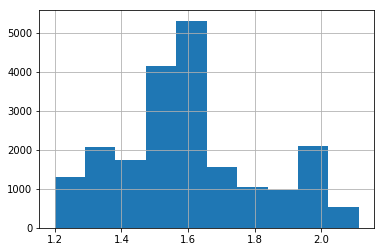

In [7]:
dataframe['Open'].hist() #Hist muestra las veces que mas se repite un dato

In [8]:
#dataframe.groupby('Open')['High'].mean().sort_values(ascending=False) #Agrupa por open sacando la media del alto

In [9]:
import seaborn as sb

C:\Users\JhonMorales\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


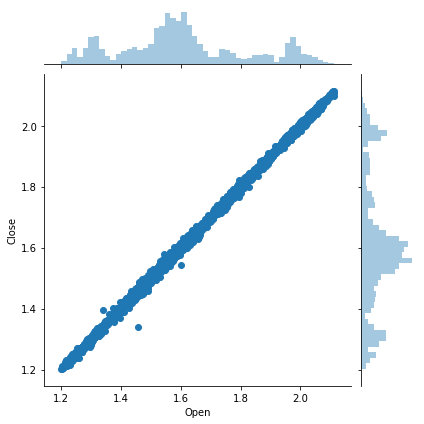

In [10]:
sb.jointplot(x=dataframe['Open'], y=dataframe['Close'],data=dataframe)

In [11]:
dataframe.keys()

Index(['Fecha', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [12]:
dataframe['SMA_20']= dataframe.Close.rolling(20).mean()
dataframe['SMA_60']= dataframe.Close.rolling(60).mean()

In [13]:
dataframe['Dif_SMA']= dataframe.SMA_20 - dataframe.SMA_60
import numpy as np

In [14]:
dataframe['Senal']=np.sign(dataframe.Dif_SMA)

C:\Users\JhonMorales\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sign
  """Entry point for launching an IPython kernel.


In [15]:
dataframe['Dif_Close']= dataframe.Close.pct_change()

In [16]:
dataframe['Retornos']= dataframe.Dif_Close * dataframe.Senal.shift(1)

In [17]:
dataframe['Capital']=(dataframe.Retornos+1).cumprod()*100

In [18]:
#dataframe[58:100]

In [19]:
dataframe = dataframe.replace(np.nan,"0")

In [20]:
dataframe.info()
#dataframe[58:100]

<class 'pandas.core.frame.DataFrame'>
Index: 20700 entries, 2005.07.11 to 2018.11.15
Data columns (total 13 columns):
Fecha        20700 non-null object
Open         20700 non-null float64
High         20700 non-null float64
Low          20700 non-null float64
Close        20700 non-null float64
Volume       20700 non-null int64
SMA_20       20700 non-null object
SMA_60       20700 non-null object
Dif_SMA      20700 non-null object
Senal        20700 non-null object
Dif_Close    20700 non-null object
Retornos     20700 non-null object
Capital      20700 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 2.2+ MB


In [21]:
#dataframe[58:200]

In [22]:
#dataframe = dataframe.drop(columns="Señal")

In [23]:
dataframe[58:100]

,Fecha,Open,High,Low,Close,Volume,SMA_20,SMA_60,Dif_SMA,Senal,Dif_Close,Retornos,Capital
2005.07.25,04:00,1.7377,1.7380,1.7354,1.7371,1512,1.744,0,0,0,-0.000172672,0,0
2005.07.25,08:00,1.7372,1.7403,1.7331,1.7398,2296,1.74401,1.75224,-0.00822833,-1,0.00155431,0,0
2005.07.25,12:00,1.7398,1.7412,1.7369,1.7402,2133,1.74415,1.75214,-0.00798667,-1,0.000229911,-0.000229911,99.977
2005.07.25,16:00,1.7401,1.7472,1.7395,1.7445,2098,1.74446,1.75191,-0.007455,-1,0.00247098,-0.00247098,99.73
2005.07.25,20:00,1.7446,1.7476,1.7443,1.7472,1672,1.74492,1.75173,-0.006815,-1,0.00154772,-0.00154772,99.5756
2005.07.26,00:00,1.7472,1.7473,1.7430,1.7433,1773,1.74525,1.75144,-0.00619667,-1,-0.00223214,0.00223214,99.7979
2005.07.26,04:00,1.7431,1.7441,1.7411,1.7422,1778,1.74532,1.75108,-0.00576,-1,-0.000630987,0.000630987,99.8609
2005.07.26,08:00,1.7422,1.7464,1.7360,1.7369,2946,1.74486,1.75057,-0.00572,-1,-0.00304213,0.00304213,100.165
2005.07.26,12:00,1.7369,1.7408,1.7348,1.7368,2950,1.74457,1.75001,-0.00544167,-1,-5.75738e-05,5.75738e-05,100.17
2005.07.26,16:00,1.7366,1.7440,1.7357,1.7408,2843,1.74429,1.74941,-0.00512167,-1,0.00230309,-0.00230309,99.9397


In [24]:
import matplotlib.pyplot as plt

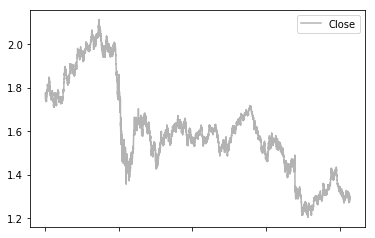

In [25]:
dataframe[['Close', 'SMA_20', 'SMA_60']].plot(color=['0.7','r', 'g'])
plt.show()

In [26]:
dataframe.tail()

,Fecha,Open,High,Low,Close,Volume,SMA_20,SMA_60,Dif_SMA,Senal,Dif_Close,Retornos,Capital
2018.11.15,00:00,1.29855,1.30019,1.29787,1.29945,11290,1.29302,1.3003,-0.00727633,-1,0.000693081,-0.000693081,84.5548
2018.11.15,04:00,1.29946,1.30121,1.29934,1.30088,7297,1.29321,1.30057,-0.00735,-1,0.00110047,-0.00110047,84.4617
2018.11.15,08:00,1.30087,1.30294,1.27830,1.27943,24732,1.2925,1.3004,-0.00790617,-1,-0.0164888,0.0164888,85.8544
2018.11.15,12:00,1.27943,1.28365,1.27500,1.27874,35998,1.29196,1.30018,-0.0082255,-1,-0.000539303,0.000539303,85.9007
2018.11.15,16:00,1.27868,1.28086,1.27292,1.27555,29496,1.29151,1.29977,-0.0082645,-1,-0.00249464,0.00249464,86.115
